## Delhi Daily Weather Forecast
In this notebook we analyze a time series DataFrame for Delhi daily weather forecast from 2013 to 2017. We specifically deal with:
- Getting the data
- Time based indexing
- Visualizing time series data
- Seasonality
- Frequencies
- Resampling
- Rolling windows
- Correlation between humidity and temperature

This analysis is adapted from [DataQuest Tutorial](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/).


### 1. Getting the data
This time series data set is obtained from [Kaggle Data Repository](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data?select=DailyDelhiClimateTrain.csv 'Title') with the following parameters:
* Mean temperature averaged out from multiple 3 hour intervals in a day.
* Humidity value for the day (units are grams of water vapor per cubic meter volume of air).
* Wind speed (measured in kmph).
* Pressure reading of weather (measured in atm).

The following packages were used:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from pandas import *
from sklearn.linear_model import LinearRegression as lr

In [2]:
# Reading a CSV data file
delhi_daily_weather = pd.read_csv('DailyDelhiClimate.csv')
delhi_daily_weather.shape

(1462, 5)

In [3]:
delhi_daily_weather.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.5,0.000000,1015.666667
1,2013-01-02,7.400000,92.0,2.980000,1017.800000
2,2013-01-03,7.166667,87.0,4.633333,1018.666667


In [4]:
delhi_daily_weather.tail(3)

,date,meantemp,humidity,wind_speed,meanpressure
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [5]:
delhi_daily_weather.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

We see something is wrong with the data type of the `date` column, we convert it using `to_datetime()` function.

In [6]:
delhi_daily_weather['date'] = pd.to_datetime(delhi_daily_weather['date'])
delhi_daily_weather.dtypes

date            datetime64[ns]
meantemp               float64
humidity               float64
wind_speed             float64
meanpressure           float64
dtype: object

Now everything looks great. Next, we set the `index` to be the `date` column.

In [7]:
delhi_daily_weather = delhi_daily_weather.set_index('date')
delhi_daily_weather.tail(3)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-30,14.095238,89.666667,6.266667,1017.904762
2016-12-31,15.052632,87.000000,7.325000,1016.100000
2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [8]:
delhi_daily_weather.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)

In [9]:
# Add columns with year, month, and weekday name
delhi_daily_weather['Year'] = delhi_daily_weather.index.year
delhi_daily_weather['Month'] = delhi_daily_weather.index.month
delhi_daily_weather['Weekday Name'] = delhi_daily_weather.index.day_name()
# Display a random sampling of 5 rows
delhi_daily_weather.sample(5, random_state=0)

,meantemp,humidity,wind_speed,meanpressure,Year,Month,Weekday Name
date,,,,,,,
2014-06-15,33.875000,52.000000,8.100000,997.125000,2014,6,Sunday
2016-05-11,32.500000,49.937500,7.775000,1006.062500,2016,5,Wednesday
2014-04-05,27.375000,44.000000,9.262500,1008.875000,2014,4,Saturday
2013-10-07,29.714286,66.571429,1.585714,1008.857143,2013,10,Monday
2014-10-20,24.750000,55.625000,4.400000,1013.125000,2014,10,Monday


### 2.  Time based indexing

This allows us to view our data on a certain interval of time depending on our needs.

In [10]:
# Viewing one row for the selected day
delhi_daily_weather.loc['2015-01-11']

meantemp             11
humidity          80.75
wind_speed       4.8625
meanpressure    1019.12
Year               2015
Month                 1
Weekday Name     Sunday
Name: 2015-01-11 00:00:00, dtype: object

In [11]:
# Slice of days
delhi_daily_weather.loc['2014-01-20':'2014-01-22']

,meantemp,humidity,wind_speed,meanpressure,Year,Month,Weekday Name
date,,,,,,,
2014-01-20,14.625000,83.500000,4.412500,1021.375000,2014,1,Monday
2014-01-21,13.571429,96.857143,7.171429,1020.571429,2014,1,Tuesday
2014-01-22,15.250000,96.125000,6.712500,1019.875000,2014,1,Wednesday


In [12]:
# Partial-string indexing for the month of March 2016
delhi_daily_weather.loc['2016-03']

,meantemp,humidity,wind_speed,meanpressure,Year,Month,Weekday Name
date,,,,,,,
2016-03-01,24.916667,57.416667,1.700000,1015.000000,2016,3,Tuesday
2016-03-02,24.933333,57.066667,1.733333,1015.400000,2016,3,Wednesday
2016-03-03,26.000000,55.615385,4.292308,1014.615385,2016,3,Thursday
2016-03-04,27.312500,44.250000,6.143750,1012.687500,2016,3,Friday
2016-03-05,23.933333,57.133333,11.000000,1012.666667,2016,3,Saturday
2016-03-06,22.812500,66.562500,5.218750,1013.062500,2016,3,Sunday
2016-03-07,23.714286,64.142857,5.171429,1012.357143,2016,3,Monday
2016-03-08,23.428571,60.214286,6.742857,1011.642857,2016,3,Tuesday
2016-03-09,24.000000,57.562500,9.375000,1012.062500,2016,3,Wednesday


### 3. Visualizing time series data

Considering the table above, `meanpressure` doesn't provide us with significant information to analyze our data. So we decide to drop it and work only with the first three columns, namely, `meantemp`, `humidity`, and `wind_speed`.

In [13]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(14, 7)})

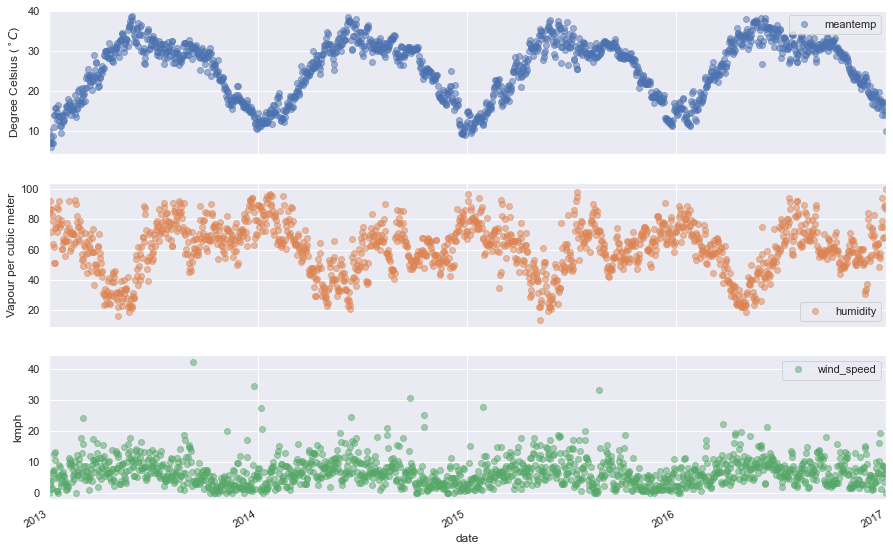

In [17]:
# Consider the meantemp, humidity and wind_speed time series
cols_plot = ['meantemp', 'humidity', 'wind_speed']
axes = delhi_daily_weather[cols_plot].plot(marker='o', figsize=(15,10),alpha=0.5, linestyle='None', subplots=True)

ylabels = ['Degree Celsius ($^\circ C$)','Vapour per cubic meter','kmph']
count = 0
for ax in axes:
    ax.set_ylabel(ylabels[count])
    count = count + 1

Considering the pattern of the figure shown above, it is evident that temperature and wind speed are inversely proportional to the amount of humidity. In the sense that, when they increase simultaneously the amount of humidity decreases. However, the wind speed seems not to vary too much with little outliers having speed of more than $20\,kmph$.

In light of the previous figure, let's consider temperature parameter only.

In [ ]:
delhi_daily_weather['meantemp'].plot(linewidth=0.7);
plt.title('2013 - 2017 Mean Temperature')
plt.ylabel('Degree Celsius ($^\circ C$)')

The figure above shows that, some periods of the year (possibly, summer time i.e., May to October) experience temperature higher than $30^\circ C$ while others (winter time i.e., December and January) have temperature below $15^\circ C$.

Let's focus on the year of 2015.

In [ ]:
# Monthly temperature in 2015
ax = delhi_daily_weather.loc['2015', 'meantemp'].plot()
ax.set_ylabel('Degree Celsius ($^\circ C$)')
plt.title('2015 Mean Temperature')

As we guessed earlier, the temperature rises beyond $30^\circ C$ between May and October, and it goes below $15^\circ C$ in January and December.

Let's now visualize our data for Jan and Feb with `x-ticks` represented in a nice format.

In [ ]:
fig, ax = plt.subplots()
ax.plot(delhi_daily_weather.loc['2015-01':'2015-02', 'meantemp'], marker='o', linestyle='-')
ax.set_ylabel('Celsius Degrees ($^\circ C$)')
ax.set_title('Jan-Feb 2017 Mean Temperature')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

Now we have vertical gridlines and nicely formatted tick labels on each Monday, so we can easily tell which days are weekdays and weekends.

### 4. Seasonality
We concentrate on yearly temperature, humidity and wind speed variations, and study their relationships.

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['meantemp', 'humidity', 'wind_speed'], axes):
    sns.boxplot(data=delhi_daily_weather, x='Month', y=name, ax=ax)
ax.set_ylabel('Kmph')
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

These box plots confirm the yearly seasonality that we saw in earlier plots.

Our next step for seasonality is based on weekly temperature, humidity and wind speed.

In [ ]:
sns.boxplot(data=delhi_daily_weather, x='Weekday Name', y='meantemp')
plt.title('Weekly mean temperature')

The figure above depicts that, the temperature doesn't change much on weekly basis as it lies between $19^\circ C$ and $32^\circ C$.

In [ ]:
sns.boxplot(data=delhi_daily_weather, x='Weekday Name', y='humidity')
plt.title('Weekly humidity')

Again there is not much variation in humidity level with some exceptional outliers on Tuesdays, Wednesdays and Thursdays.

In [ ]:
sns.boxplot(data=delhi_daily_weather, x='Weekday Name', y='wind_speed')
plt.title('Weekly wind speed')

### 5. Frequencies

In [ ]:
delhi_daily_weather.index

In [ ]:
# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
# Select the specified dates and just the meantemp column
meantemp_sample = delhi_daily_weather.loc[times_sample, ['meantemp']].copy()
meantemp_sample

In [ ]:
# Convert the data to daily frequency, without filling any missings
meantemp_freq = meantemp_sample.asfreq('D')
# Create a column with missings forward filled
meantemp_freq['meantemp - Forward Fill'] = meantemp_sample.asfreq('D', method='ffill')
meantemp_freq

### 6. Resampling
Using `resample()` method and apply aggregation methods `mean()`, `mode()`, `median()`, etc

In [ ]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['meantemp', 'humidity', 'wind_speed']
# Resample to weekly frequency, aggregating with mean
delhi_weekly_mean = delhi_daily_weather[data_columns].resample('W').mean()
delhi_weekly_mean.head(3)

In [ ]:
delhi_weekly_mean.tail(3)

In [ ]:
# Comparing the rows after resampling the data on weekly mean
print(delhi_daily_weather.shape[0])
print(delhi_weekly_mean.shape[0])

Let’s plot the daily and weekly mean temperature time series together over a single six-month period to compare them.

In [ ]:
# Start and end of the date range to extract
start, end = '2015-01', '2015-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(delhi_daily_weather.loc[start:end, 'meantemp'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(delhi_weekly_mean.loc[start:end, 'meantemp'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Mean Temperature ($^\circ C$)')
ax.legend();

We can see that the weekly mean time series is smoother than the daily time series because higher frequency variability has been averaged out in the resampling.

In [ ]:
# Compute the maximum monthly of data
delhi_monthly_max = delhi_daily_weather[data_columns].resample('M').max()
delhi_monthly_max.head(3)

In [ ]:
delhi_monthly_max.tail(3)

Let’s explore this further by resampling to annual frequency and computing the ratio of `meantemp` to `humidity` for each year.

In [ ]:
# Compute the maximum annual temperature
delhi_annual_max = delhi_daily_weather[data_columns].resample('A').max()
# The default index of the resampled DataFrame is the last day of each year,
# ('2013-12-31', '2014-12-31', etc.) so to make life easier, set the index
# to the year component
delhi_annual_max = delhi_annual_max.set_index(delhi_annual_max.index.year)
delhi_annual_max.index.name = 'Year'
# Compute the ratio of meantemp to humidity
delhi_annual_max['Ratio'] = delhi_annual_max['meantemp'] / delhi_annual_max['humidity']
delhi_annual_max.head(5)

Finally, let’s plot the  ratio of `meantemp` and `humidity` as a bar chart.

In [ ]:
ax = delhi_annual_max.loc[2013:, 'Ratio'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, .5)
ax.set_title('Humidity temperature ratio')
plt.xticks(rotation=0);

The figure above tells us that, the ratio lies between $0.35$ and $0.45$ for the first four years and it is far below for $2017$ because there are not enough data for that year.

### 7. Rolling Windows
Let’s use the `rolling()` method to compute the 7-day rolling mean of our daily data.

In [ ]:
# Compute the centered 7-day rolling mean
delhi_7d = delhi_daily_weather[data_columns].rolling(7, center=True).mean()
delhi_7d.head(10)

To visualize the differences between rolling mean and resampling, let’s update our earlier plot of January-June 2015 mean temperature to include the 7-day rolling mean along with the weekly mean resampled time series and the original daily data.

In [ ]:
# Start and end of the date range to extract
start, end = '2015-01', '2015-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(delhi_daily_weather.loc[start:end, 'meantemp'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(delhi_weekly_mean.loc[start:end, 'meantemp'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(delhi_7d.loc[start:end, 'meantemp'],
        marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Mean Temperature ($^\circ C$)')
ax.legend();

We can see that data points in the rolling mean time series have the same spacing as the daily data, but the curve is smoother because higher frequency variability has been averaged out. In the rolling mean time series, the peaks and troughs tend to align closely with the peaks and troughs of the daily time series. In contrast, the peaks and troughs in the weekly resampled time series are less closely aligned with the daily time series, since the resampled time series is at a coarser granularity.

We’ve already computed 7-day rolling means, so now let’s compute the 365-day rolling mean of our weather data.

In [ ]:
# The min_periods=360 argument accounts for a few isolated missing days
delhi_365d = delhi_daily_weather[data_columns].rolling(window=365, center=True, min_periods=360).mean()
delhi_365d.tail(400)

Let’s plot the 7-day and 365-day rolling mean temperature, along with the daily time series.

In [ ]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(delhi_daily_weather['meantemp'], marker='.', markersize=4, color='0.6',
        linestyle='None', label='Daily')
ax.plot(delhi_7d['meantemp'], linewidth=2, label='7-d Rolling Mean')
ax.plot(delhi_365d['meantemp'], color='0.2', linewidth=3,
        label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Mean Temperature ($^\circ C$)')
ax.set_title('Trends in Tempeature');

Annual trend of humidity.

In [ ]:
# Plot 365-day rolling mean time series of humidity
fig, ax = plt.subplots()
for nm in ['humidity']:
    ax.plot(delhi_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(58, 67)
    ax.legend()
    ax.set_ylabel('Vapor per cubic meter')
    ax.set_title('Trends in humidity (365-d Rolling Means)');

### 8. Correlation between humidity and temperature

In [ ]:
temperature = np.array(delhi_daily_weather['meantemp'])
humidity = np.array(delhi_daily_weather['humidity']).reshape(-1,1)
model = lr().fit(humidity, temperature)
#Coefficient of determination r_sq
print('r_sq = ', model.score(humidity, temperature),'\n')
#Intercept
print('Intercept = ', model.intercept_,'\n')
#Slope
print('Slope = ', model.coef_,'\n\n')
pred_temp = model.predict(humidity)

In [ ]:
# fig, ax = plt.subplots()
# ax.plot(delhi_daily_weather['Year'], temperature, 'o', label='Mean Temperature')
# ax.plot(delhi_daily_weather['Year'], pred_temp, 'o', label='Predicted Temperature')
# ax.set_ylabel('Mean Temperature Vs Predicted')
# ax.legend();